In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [70]:
data = 'base_nova.xlsx'
df = pd.read_excel(data)

In [71]:
df.head()

,ID,data_transacao,ano_veiculo,porte_veiculo,tipo_combustivel,litros,vl_por_litro,km_rodados,km_por_litro,vl_emissao
0,1,2022-01-01,2020,PEQUENO,GASOLINA COMUM,15.55,7.567,150,9.65,117.68
1,2,2022-01-01,2020,PEQUENO,GASOLINA COMUM,50.37,7.569,500,9.93,381.26
2,3,2022-01-01,2005,PEQUENO,GASOLINA COMUM,10.08,7.569,300,29.76,76.30
3,4,2022-01-01,2015,PEQUENO,GASOLINA COMUM,10.07,7.571,300,29.79,76.25
4,5,2022-01-01,2014,PESADO,DIESEL S10,70.00,5.714,500,7.14,400.00


# ETL

In [72]:
# Verifying if we have null values

df.isnull().sum()

ID                  0
data_transacao      0
ano_veiculo         0
porte_veiculo       0
tipo_combustivel    0
litros              0
vl_por_litro        0
km_rodados          0
km_por_litro        0
vl_emissao          0
dtype: int64

In [73]:
# Converting categorical data
# We have 'porte_veiculo' and 'tipo_combustivel' as categorical data

df['porte_veiculo'] = df['porte_veiculo'].astype('category')

porte_veiculo = df['porte_veiculo'].cat.categories

df['porte_veiculo'] = df['porte_veiculo'].cat.codes + 1

mapping = pd.DataFrame({'porte_veiculo': porte_veiculo, 'Code': range(1, len(porte_veiculo) + 1)})
print(mapping)

  porte_veiculo  Code
0         MEDIO     1
1       PEQUENO     2
2        PESADO     3


In [74]:
df['tipo_combustivel'] = df['tipo_combustivel'].astype('category')

tipo_combustivel = df['tipo_combustivel'].cat.categories

df['tipo_combustivel'] = df['tipo_combustivel'].cat.codes + 1

mapping = pd.DataFrame({'tipo_combustivel': tipo_combustivel, 'Code': range(1, len(tipo_combustivel) + 1)})
print(mapping)

     tipo_combustivel  Code
0              DIESEL     1
1          DIESEL S10     2
2    ETANOL HIDRATADO     3
3  GASOLINA ADITIVADA     4
4      GASOLINA COMUM     5


# EDA

In [75]:
# Looking for the correlation between vl_emissao and other variables

df.corr()['vl_emissao']

ID                  0.079001
data_transacao     -0.031484
ano_veiculo         0.150063
porte_veiculo       0.171351
tipo_combustivel   -0.467329
litros              0.959633
vl_por_litro        0.266801
km_rodados          0.653069
km_por_litro       -0.257607
vl_emissao          1.000000
Name: vl_emissao, dtype: float64

In [76]:
vl_emissao = df['vl_emissao']

df = df.drop(['vl_emissao', 'data_transacao', 'ano_veiculo', 'vl_por_litro', 'km_por_litro', 'ID'], axis=1)
df['vl_emissao'] = vl_emissao
df

,porte_veiculo,tipo_combustivel,litros,km_rodados,vl_emissao
0,2,5,15.55,150,117.68
1,2,5,50.37,500,381.26
2,2,5,10.08,300,76.30
3,2,5,10.07,300,76.25
4,3,2,70.00,500,400.00
...,...,...,...,...,...
292603,2,5,60.00,480,380.40
292604,3,2,60.00,270,371.40
292605,3,2,45.00,234,272.25
292606,2,5,49.27,384,300.05


C:\Users\joaoc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


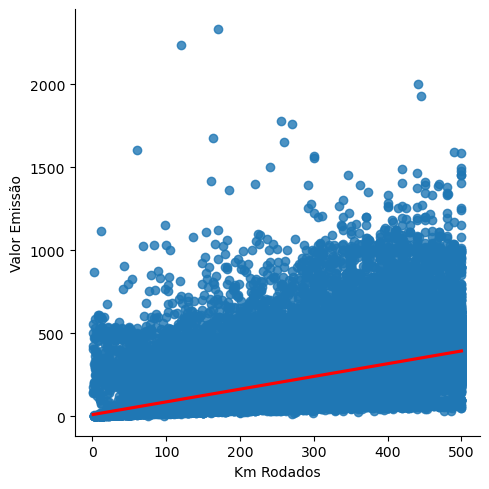

In [41]:
sns.lmplot(x='km_rodados', y='vl_emissao', data=df, line_kws={'color': 'red'}, ci=95)
plt.xlabel('Km Rodados')
plt.ylabel('Valor Emissão')
plt.show()

C:\Users\joaoc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


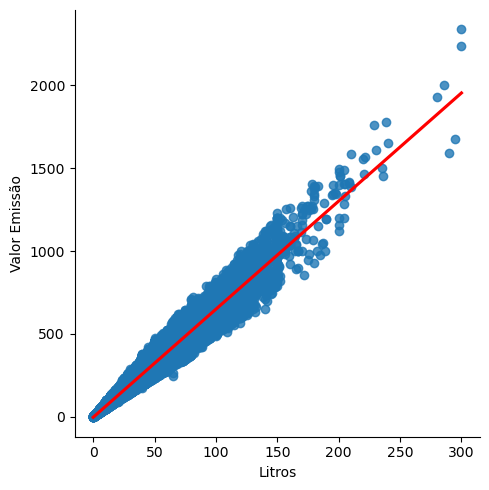

In [45]:
sns.lmplot(x='litros', y='vl_emissao', data=df, line_kws={'color': 'red'}, ci=95)
plt.xlabel('Litros')
plt.ylabel('Valor Emissão')
plt.show()

# Modeling

In [77]:
df_np = df.to_numpy()
df_np.shape

(292608, 5)

In [78]:
X_train, y_train = df_np[:, :4], df_np[:, -1]

X_train.shape, y_train.shape

((292608, 4), (292608,))

In [79]:
sklearn_model = LinearRegression().fit(X_train, y_train)

sklearn_y_predictions = sklearn_model.predict(X_train)
sklearn_y_predictions.shape

(292608,)

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mean_absolute_error(sklearn_y_predictions, y_train), mean_squared_error(sklearn_y_predictions, y_train), r2_score(sklearn_y_predictions, y_train)

(26.86769076820463, 1342.71136583029, 0.9198054126075773)

In [81]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [84]:
intercept = lr.intercept_
coefficients = lr.coef_

print(intercept)
print(coefficients)

coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

print(coeff_df)

28.820650047007263
[ 1.02567135 -6.44240609  6.36669878 -0.01377022]
            Feature  Coefficient
0            litros     1.025671
1        km_rodados    -6.442406
2     porte_veiculo     6.366699
3  tipo_combustivel    -0.013770


# Predictions

In [46]:
predictions_df = pd.DataFrame({'litros': df['litros'],
                               'km_rodados': df['km_rodados'],
                               'vl_emissao': df['vl_emissao'],
                               'porte_veiculo': df['porte_veiculo'],
                               'tipo_combustivel': df['tipo_combustivel'],
                               'sklearn vl_emissao predictions' : sklearn_y_predictions})

predictions_df

,litros,km_rodados,vl_emissao,porte_veiculo,tipo_combustivel,sklearn vl_emissao predictions
0,15.55,150,117.68,2,5,95.596595
1,50.37,500,381.26,2,5,312.465468
2,10.08,300,76.30,2,5,58.705219
3,10.07,300,76.25,2,5,58.641552
4,70.00,500,400.00,3,2,457.796654
...,...,...,...,...,...,...
292603,60.00,480,380.40,2,5,374.052181
292604,60.00,270,371.40,3,2,397.296818
292605,45.00,234,272.25,3,2,302.292064
292606,49.27,384,300.05,2,5,307.059445


# Modeling Alternative

In [65]:
X = df[['litros', 'km_rodados', 'porte_veiculo', 'tipo_combustivel']]
y = df['vl_emissao']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [66]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [67]:
lr.score(X_test, y_test)

0.9270641763257506

In [68]:
intercept = lr.intercept_
coefficients = lr.coef_

print(intercept)
print(coefficients)

29.105789806367824
[ 6.35733006 -0.01295796  1.0005382  -6.4660253 ]


In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = lr.predict(X_test)

In [51]:
mean_absolute_error(y_test, y_pred)

26.748860070384513

In [52]:
mean_squared_error(y_test, y_pred)

1331.564671510652

In [53]:
r2_score(y_test, y_pred)

0.9270641763257506

In [62]:
y_pred_full = lr.predict(X)

predictions_df_2 = pd.DataFrame({'litros': df['litros'],
                               'km_rodados': df['km_rodados'],
                               'porte_veiculo': df['porte_veiculo'],
                               'tipo_combustivel': df['tipo_combustivel'],
                               'vl_emissao': df['vl_emissao'],
                               'sklearn vl_emissao pred' : y_pred_full})

predictions_df_2

,litros,km_rodados,porte_veiculo,tipo_combustivel,vl_emissao,sklearn vl_emissao pred
0,15.55,150,2,5,117.68,95.689529
1,50.37,500,2,5,381.26,312.516477
2,10.08,300,2,5,76.30,58.971240
3,10.07,300,2,5,76.25,58.907667
4,70.00,500,3,2,400.00,457.709480
...,...,...,...,...,...,...
292603,60.00,480,2,5,380.40,373.996725
292604,60.00,270,3,2,371.40,397.116509
292605,45.00,234,3,2,272.25,302.223045
292606,49.27,384,2,5,300.05,307.026537


In [63]:
intercept = lr.intercept_
coefficients = lr.coef_

print(intercept)
print(coefficients)

29.105789806367824
[ 6.35733006 -0.01295796  1.0005382  -6.4660253 ]


In [1]:
print(f"Intercepto (β0): {intercept}")
print(f"Coeficiente para litros (β1): {coefficients[0]}")
print(f"Coeficiente para km_rodados (β2): {coefficients[1]}")
print(f"Coeficiente para porte_veiculo (β3): {coefficients[2]}")
print(f"Coeficiente para tipo_combustivel (β4): {coefficients[3]}")
print(f"Coeficiente para ano (β5): {coefficients[4]}")

NameError: name 'intercept' is not defined